In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [3]:
dataset = np.loadtxt("diabetes.csv", delimiter=",", skiprows=1)


In [4]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [5]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#fit
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.6456 - loss: 2.9500 - val_accuracy: 0.6364 - val_loss: 1.5588
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6115 - loss: 1.4051 - val_accuracy: 0.6407 - val_loss: 1.0693
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6450 - loss: 1.0437 - val_accuracy: 0.6320 - val_loss: 1.0072
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.7707 - val_accuracy: 0.6450 - val_loss: 0.7619
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.7183 - val_accuracy: 0.6580 - val_loss: 0.7066
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.6998 - val_accuracy: 0.6450 - val_loss: 0.7579
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6591 - loss: 0.7902 - val_accuracy: 0.5844 - val_loss: 0.8303
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.6620 - val_accuracy: 0.6450 - 

In [ ]:
#evaluate model
#scores = model.evaluate(X_test, y_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 2.4395 

compile_metrics: 66.93%


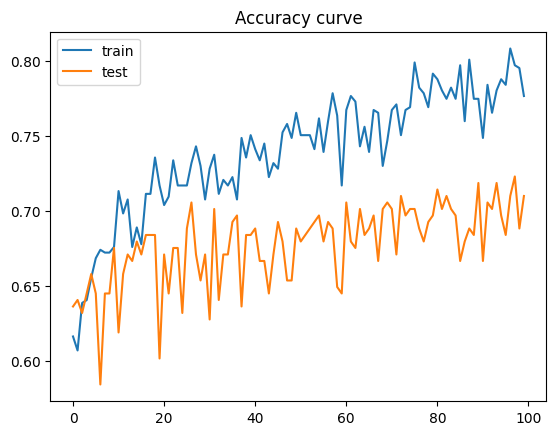

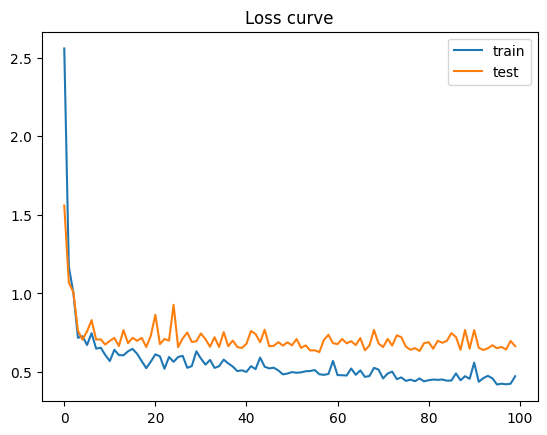

In [10]:
from matplotlib import pyplot as plt
plt.title("Accuracy curve")
plt.plot(model.history.history["accuracy"], label="train")
plt.plot(model.history.history["val_accuracy"], label="test")
plt.legend()
plt.show()

#loss curve
plt.title("Loss curve")
plt.plot(model.history.history["loss"], label="train")
plt.plot(model.history.history["val_loss"], label="test")
plt.legend()
plt.show()